In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

['bus_stops_wszone.dbf', 'bus_stops_wszone.shp', 'net_202001_weekday_G.net', 'singstat', 'net_202001_weekend_G.net', 'origin_destination_bus_202001_scaleddown.csv.xz', 'net_202001_weekendb.net', 'OD_bus', 'net_202001_weekdayb.net', 'train_station_wszone.prj', 'origin_destination_train_202001.csv.xz', 'train_station_wszone.dbf', 'OD_202001_weekend.csv.xz', 'subzone_centroid.csv', 'transport_node_bus_202001.csv', 'train_station_wszone.cpg', 'OD_PT', 'train_station_wszone.shx', 'planning-area-2014', 'subzone_centroid_pos.json', '.ipynb_checkpoints', 'origin_destination_bus_202001.csv.xz', 'region-2014', 'train_station_wszone.shp', 'OD_train', 'bus_stops_wszone.shx', 'OD_202001_weekday.csv.xz', 'bus_stops_wszone.prj', 'subzone-2014', 'bus_stops_wszone.cpg']


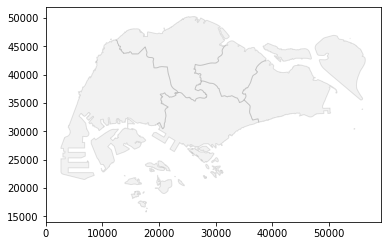

In [3]:
data_dir = "../../data"
print(os.listdir(data_dir))

#os.listdir("../data")
region = gpd.read_file("../../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [4]:
with open(os.path.join("../../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

data

In [5]:
day = "weekday" # "weekend"
fp = os.path.join(data_dir, "net_202001_{}b.net".format(day))
dg1 = nx.read_pajek(fp)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

In [6]:
dg1 = nx.DiGraph(dg1)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

In [7]:
for u,v,d in dg1.edges(data=True):
    print(d)
    break

{'weight': 593.3123935359419}


In [8]:
day = "weekend"
fp2 = os.path.join(data_dir, "net_202001_{}b.net".format(day))
dg2 = nx.read_pajek(fp2)
dg2.number_of_nodes(), dg2.number_of_edges()

(303, 30043)

In [9]:
dg2 = nx.DiGraph(dg2)
dg2.number_of_nodes(), dg2.number_of_edges()

(303, 30043)

In [10]:
h1, a1 = nx.hits(dg1, max_iter=1000, tol=1e-08,)
h2, a2 = nx.hits(dg2, max_iter=1000, tol=1e-08,)

In [11]:

node_stats_1 = {"in_degree": dict(dg1.in_degree(weight="weight")), 
              "out_degree": dict(dg1.out_degree(weight="weight")), 
              "PageRank": nx.pagerank(dg1, weight="weight"), 
              "HITS_hub": h1, 
              "HITS_authority": a1
             }
df_stats_1 = pd.DataFrame.from_dict(node_stats_1)
df_stats_1.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,6543.745634,4965.819377,0.001898,0.000899,0.000840
AIRPORT ROAD,1010.130918,933.699655,0.000655,0.000179,0.000164
ALEXANDRA HILL,17345.711058,14349.354850,0.003598,0.001036,0.001389
ALEXANDRA NORTH,1370.399900,2080.343000,0.000745,0.000158,0.000062
ALJUNIED,74166.097943,72493.656869,0.011334,0.013225,0.013935


In [12]:

node_stats_2 = {"in_degree": dict(dg2.in_degree(weight="weight")), 
              "out_degree": dict(dg2.out_degree(weight="weight")), 
              "PageRank": nx.pagerank(dg2, weight="weight"), 
              "HITS_hub": h2, 
              "HITS_authority": a2
             }
df_stats_2 = pd.DataFrame.from_dict(node_stats_2)
df_stats_2.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,7978.906268,5941.182610,0.002061,0.001088,0.001000
AIRPORT ROAD,166.472703,156.569583,0.000523,0.000023,0.000019
ALEXANDRA HILL,17082.631483,12750.956603,0.003611,0.001095,0.001433
ALEXANDRA NORTH,971.132551,1208.055298,0.000673,0.000095,0.000069
ALJUNIED,85251.675095,82717.494526,0.012953,0.015724,0.017618


Text(0, 0.5, 'out_degree')

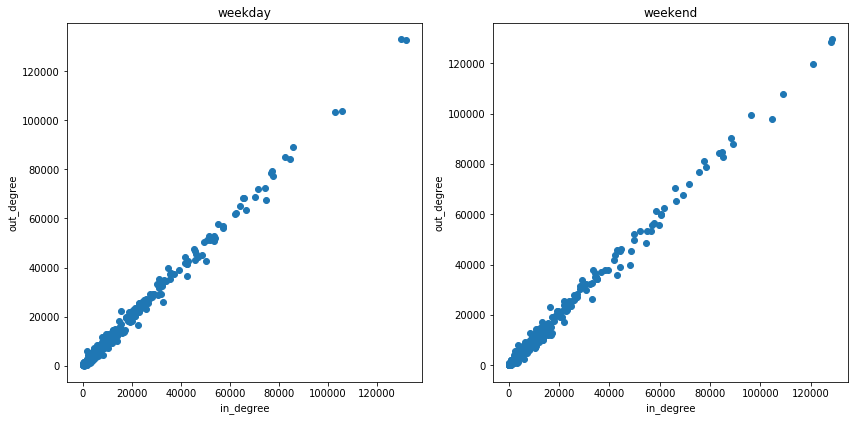

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["in_degree"], df_stats_1["out_degree"])
axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("in_degree")
axs[0].set_ylabel("out_degree")

axs[1].scatter(df_stats_2["in_degree"], df_stats_2["out_degree"])
axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("in_degree")
axs[1].set_ylabel("out_degree")

Text(0, 0.5, 'PageRank')

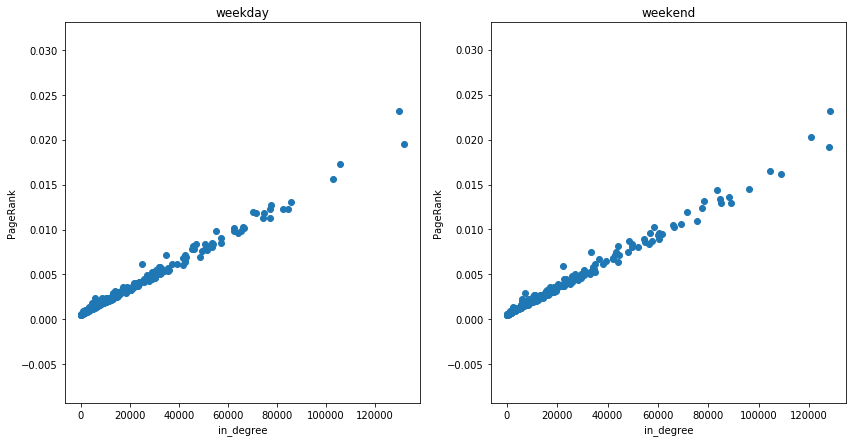

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["in_degree"], df_stats_1["PageRank"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("in_degree")
axs[0].set_ylabel("PageRank")

axs[1].scatter(df_stats_2["in_degree"], df_stats_2["PageRank"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("in_degree")
axs[1].set_ylabel("PageRank")

Text(0, 0.5, 'HITS_authority')

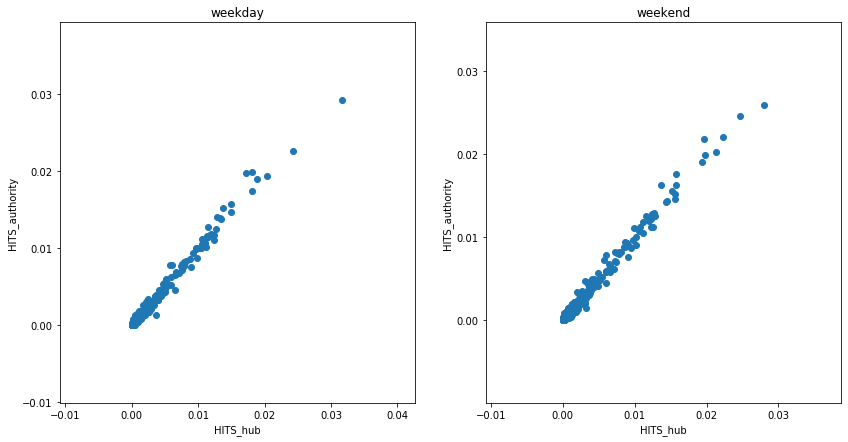

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["HITS_hub"], df_stats_1["HITS_authority"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("HITS_hub")
axs[0].set_ylabel("HITS_authority")

axs[1].scatter(df_stats_2["HITS_hub"], df_stats_2["HITS_authority"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("HITS_hub")
axs[1].set_ylabel("HITS_authority")

Text(0, 0.5, 'HITS_authority')

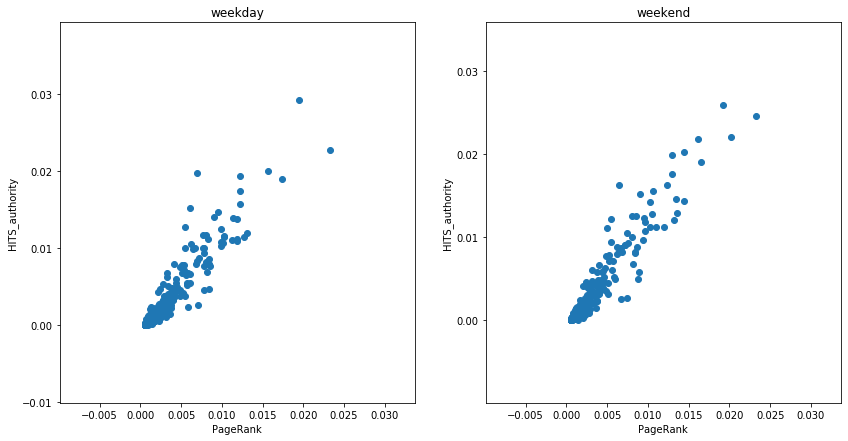

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["PageRank"], df_stats_1["HITS_authority"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("PageRank")
axs[0].set_ylabel("HITS_authority")

axs[1].scatter(df_stats_2["PageRank"], df_stats_2["HITS_authority"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("PageRank")
axs[1].set_ylabel("HITS_authority")

Text(0, 0.5, 'HITS_hub')

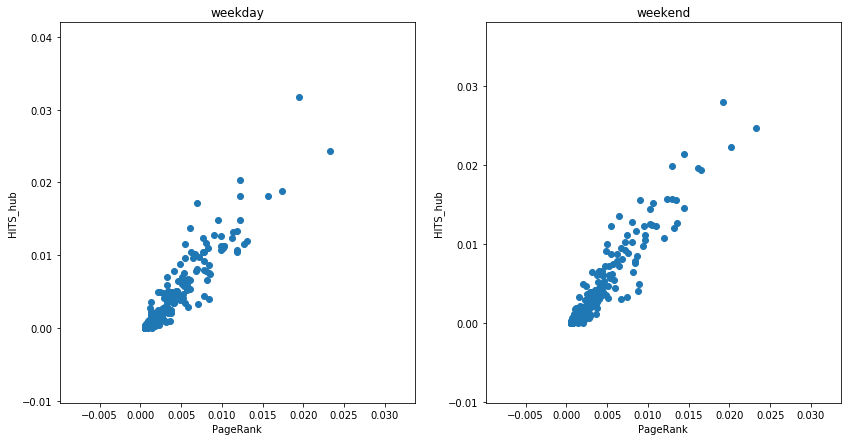

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["PageRank"], df_stats_1["HITS_hub"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("PageRank")
axs[0].set_ylabel("HITS_hub")

axs[1].scatter(df_stats_2["PageRank"], df_stats_2["HITS_hub"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("PageRank")
axs[1].set_ylabel("HITS_hub")

Text(0, 0.5, 'HITS_authority')

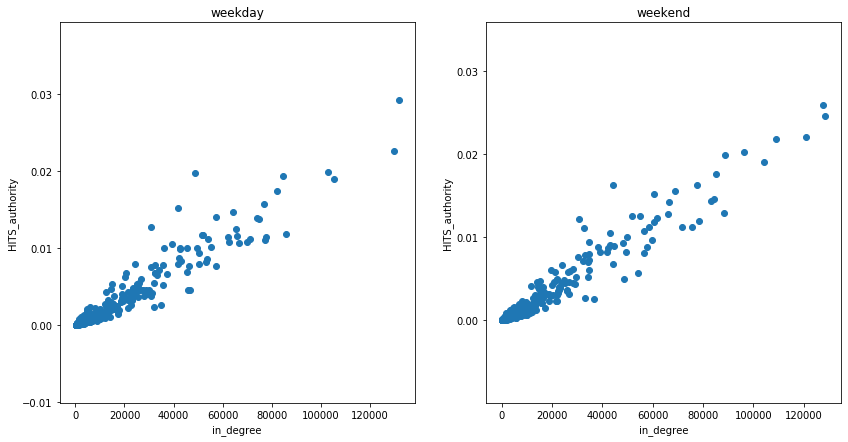

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["in_degree"], df_stats_1["HITS_authority"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("in_degree")
axs[0].set_ylabel("HITS_authority")

axs[1].scatter(df_stats_2["in_degree"], df_stats_2["HITS_authority"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("in_degree")
axs[1].set_ylabel("HITS_authority")

Text(0, 0.5, 'HITS_hub')

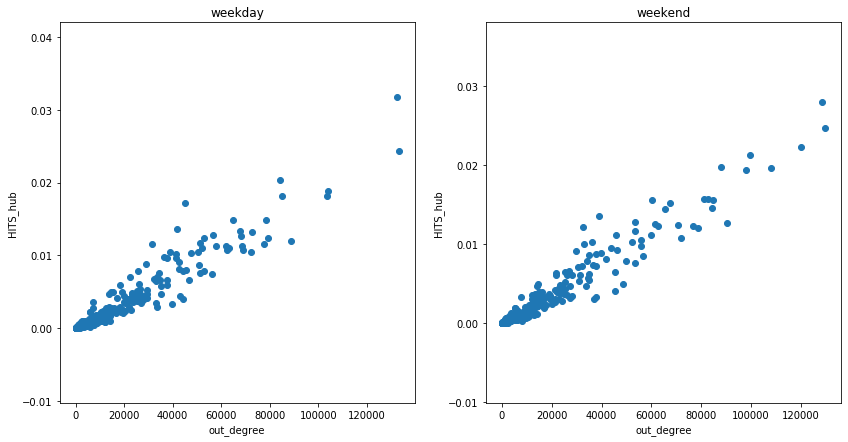

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["out_degree"], df_stats_1["HITS_hub"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("out_degree")
axs[0].set_ylabel("HITS_hub")

axs[1].scatter(df_stats_2["out_degree"], df_stats_2["HITS_hub"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("out_degree")
axs[1].set_ylabel("HITS_hub")

In [20]:
df_stats_1.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,6543.745634,4965.819377,0.001898,0.000899,0.000840
AIRPORT ROAD,1010.130918,933.699655,0.000655,0.000179,0.000164
ALEXANDRA HILL,17345.711058,14349.354850,0.003598,0.001036,0.001389
ALEXANDRA NORTH,1370.399900,2080.343000,0.000745,0.000158,0.000062
ALJUNIED,74166.097943,72493.656869,0.011334,0.013225,0.013935


In [21]:
df_stats_2.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,7978.906268,5941.182610,0.002061,0.001088,0.001000
AIRPORT ROAD,166.472703,156.569583,0.000523,0.000023,0.000019
ALEXANDRA HILL,17082.631483,12750.956603,0.003611,0.001095,0.001433
ALEXANDRA NORTH,971.132551,1208.055298,0.000673,0.000095,0.000069
ALJUNIED,85251.675095,82717.494526,0.012953,0.015724,0.017618


In [22]:
df_stat = pd.merge(df_stats_1, df_stats_2, left_index=True, right_index=True, suffixes=("_weekday", "_weekend"), how="outer")
df_stat.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
ADMIRALTY,6543.745634,4965.819377,0.001898,0.000899,0.000840,7978.906268,5941.182610,0.002061,0.001088,0.001000
AIRPORT ROAD,1010.130918,933.699655,0.000655,0.000179,0.000164,166.472703,156.569583,0.000523,0.000023,0.000019
ALEXANDRA HILL,17345.711058,14349.354850,0.003598,0.001036,0.001389,17082.631483,12750.956603,0.003611,0.001095,0.001433
ALEXANDRA NORTH,1370.399900,2080.343000,0.000745,0.000158,0.000062,971.132551,1208.055298,0.000673,0.000095,0.000069
ALJUNIED,74166.097943,72493.656869,0.011334,0.013225,0.013935,85251.675095,82717.494526,0.012953,0.015724,0.017618


In [23]:
df_stat.to_csv("results/node_density_stat.csv", index_label="node")

In [24]:
df_stat = pd.read_csv("results/node_density_stat.csv", index_col=0)
df_stat.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,6543.745634,4965.819377,0.001898,0.000899,0.000840,7978.906268,5941.182610,0.002061,0.001088,0.001000
AIRPORT ROAD,1010.130918,933.699655,0.000655,0.000179,0.000164,166.472703,156.569583,0.000523,0.000023,0.000019
ALEXANDRA HILL,17345.711058,14349.354850,0.003598,0.001036,0.001389,17082.631483,12750.956603,0.003611,0.001095,0.001433
ALEXANDRA NORTH,1370.399900,2080.343000,0.000745,0.000158,0.000062,971.132551,1208.055298,0.000673,0.000095,0.000069
ALJUNIED,74166.097943,72493.656869,0.011334,0.013225,0.013935,85251.675095,82717.494526,0.012953,0.015724,0.017618


In [25]:
[ col for col in df_stat.columns if "in_degree" in col ]

['in_degree_weekday', 'in_degree_weekend']

In [26]:
compare_cols = [ col for col in df_stat.columns if "in_degree" in col ]
df_stat[compare_cols].corr()

,in_degree_weekday,in_degree_weekend
in_degree_weekday,1.000000,0.973159
in_degree_weekend,0.973159,1.000000


In [27]:
compare_cols = [ col for col in df_stat.columns if "out_degree" in col ]
df_stat[compare_cols].corr()

,out_degree_weekday,out_degree_weekend
out_degree_weekday,1.000000,0.970651
out_degree_weekend,0.970651,1.000000


In [28]:
compare_cols = [ col for col in df_stat.columns if "PageRank" in col ]
df_stat[compare_cols].corr()

,PageRank_weekday,PageRank_weekend
PageRank_weekday,1.000000,0.974996
PageRank_weekend,0.974996,1.000000


In [29]:
compare_cols = [ col for col in df_stat.columns if "HITS_hub" in col ]
df_stat[compare_cols].corr()

,HITS_hub_weekday,HITS_hub_weekend
HITS_hub_weekday,1.000000,0.963542
HITS_hub_weekend,0.963542,1.000000


In [30]:
compare_cols = [ col for col in df_stat.columns if "HITS_authority" in col ]
df_stat[compare_cols].corr()

,HITS_authority_weekday,HITS_authority_weekend
HITS_authority_weekday,1.000000,0.966515
HITS_authority_weekend,0.966515,1.000000


In [31]:
compare_cols = [ col for col in df_stat.columns if "weekday" in col ]
df_stat[compare_cols].corr()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday
in_degree_weekday,1.000000,0.996998,0.994692,0.953840,0.950077
out_degree_weekday,0.996998,1.000000,0.992393,0.953155,0.945717
PageRank_weekday,0.994692,0.992393,1.000000,0.938051,0.932820
HITS_hub_weekday,0.953840,0.953155,0.938051,1.000000,0.993670
HITS_authority_weekday,0.950077,0.945717,0.932820,0.993670,1.000000


In [32]:
compare_cols = [ col for col in df_stat.columns if "weekend" in col ]
df_stat[compare_cols].corr()

,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
in_degree_weekend,1.000000,0.996937,0.994407,0.965245,0.965636
out_degree_weekend,0.996937,1.000000,0.991916,0.966321,0.962541
PageRank_weekend,0.994407,0.991916,1.000000,0.951854,0.951289
HITS_hub_weekend,0.965245,0.966321,0.951854,1.000000,0.994003
HITS_authority_weekend,0.965636,0.962541,0.951289,0.994003,1.000000


In [33]:
df_stat = pd.read_csv("results/node_density_stat.csv", index_col=0)
df_stat.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,6543.745634,4965.819377,0.001898,0.000899,0.000840,7978.906268,5941.182610,0.002061,0.001088,0.001000
AIRPORT ROAD,1010.130918,933.699655,0.000655,0.000179,0.000164,166.472703,156.569583,0.000523,0.000023,0.000019
ALEXANDRA HILL,17345.711058,14349.354850,0.003598,0.001036,0.001389,17082.631483,12750.956603,0.003611,0.001095,0.001433
ALEXANDRA NORTH,1370.399900,2080.343000,0.000745,0.000158,0.000062,971.132551,1208.055298,0.000673,0.000095,0.000069
ALJUNIED,74166.097943,72493.656869,0.011334,0.013225,0.013935,85251.675095,82717.494526,0.012953,0.015724,0.017618


In [34]:
df_stat.describe()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3.030000e+02,303.000000
mean,18207.159494,18207.159494,0.003300,0.003300,0.003300,17934.274805,17934.274805,0.003300,3.300330e-03,0.003300
std,22230.263193,22311.754525,0.003363,0.004502,0.004474,23427.280514,23405.430864,0.003582,4.676847e-03,0.004678
min,156.699349,52.581918,0.000521,0.000004,0.000008,129.618053,6.142442,0.000519,1.855210e-07,0.000003
25%,3499.313594,3393.333343,0.001110,0.000471,0.000465,3034.428823,2888.680593,0.001068,4.288217e-04,0.000414
50%,9499.145934,9826.196461,0.002017,0.001267,0.001344,9085.548602,9211.405976,0.002061,1.272485e-03,0.001276
75%,24025.362911,25319.125166,0.004124,0.004459,0.004399,22194.966593,22997.869968,0.003878,3.859684e-03,0.003958
max,131708.907335,133082.683581,0.023240,0.031741,0.029191,128388.397432,129569.820252,0.023229,2.796821e-02,0.025878


In [35]:
df_stat["in_degree_weekday"].min()

156.69934908643262

In [36]:
df_stat2 = df_stat.copy()
for col in df_stat.columns:
    scale = df_stat[col].max() - df_stat[col].min()
    df_stat2[col] = (df_stat[col] - df_stat[col].min()) / scale
df_stat2.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,0.048551,0.036933,0.060612,0.028214,0.028508,0.061199,0.045808,0.067892,0.038888,0.038550
AIRPORT ROAD,0.006487,0.006623,0.005869,0.005507,0.005368,0.000287,0.001161,0.000182,0.000832,0.000619
ALEXANDRA HILL,0.130663,0.107470,0.135408,0.032508,0.047346,0.132178,0.098367,0.136138,0.039150,0.055265
ALEXANDRA NORTH,0.009226,0.015243,0.009854,0.004846,0.001865,0.006561,0.009277,0.006795,0.003378,0.002542
ALJUNIED,0.562586,0.544546,0.475933,0.416580,0.477250,0.663674,0.638384,0.547525,0.562194,0.680763


In [37]:
df_stat2.describe()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.137211,0.136470,0.122322,0.103868,0.112830,0.138818,0.138373,0.122477,0.117997,0.127432
std,0.168984,0.167720,0.148020,0.141852,0.153318,0.182656,0.180648,0.157729,0.167221,0.180784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025409,0.025113,0.025921,0.014728,0.015683,0.022648,0.022248,0.024160,0.015326,0.015871
50%,0.071017,0.073469,0.065848,0.039795,0.045809,0.069827,0.071048,0.067892,0.045491,0.049194
75%,0.181439,0.189931,0.158562,0.140368,0.150487,0.172038,0.177455,0.147898,0.137997,0.152847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_stat2.to_csv("results/node_density_stat_normalized.csv", index_label="node")